<a href="https://colab.research.google.com/github/ucfilho/Higor/blob/main/ANN/Higor_MN_ann_v3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# bibliotecas usadas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import optimize
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import r2_score 

In [2]:
!gdown 14YRLadLlay7V3KLCnTvLzlqD_mVKKHZe
df = pd.read_excel('Analises_absorção_V2.xlsx','Planilha4')
df = df[['TMB','EDTA','H2SO4','D2EHPA','MN']]
X = np.array(df.drop(['MN'],axis=1))
y = df['MN'].values.reshape(-1,1).copy()

Downloading...
From: https://drive.google.com/uc?id=14YRLadLlay7V3KLCnTvLzlqD_mVKKHZe
To: /content/Analises_absorção_V2.xlsx
100% 29.3k/29.3k [00:00<00:00, 64.8MB/s]


In [3]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.40,0.08,7.700000
1,30,2,0.40,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.40,0.08,11.625000
5,30,4,0.40,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.40,0.08,8.374167
9,50,2,0.40,0.16,10.686667


In [4]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.40,0.08,7.700000
1,30,2,0.40,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.40,0.08,11.625000
5,30,4,0.40,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.40,0.08,8.374167
9,50,2,0.40,0.16,10.686667


In [5]:

scaler_X = preprocessing.MinMaxScaler((-1,1)).fit(X)
scaler_Y = preprocessing.MinMaxScaler((-1,1)).fit(y)
# X_train = scaler_X.transform(X)
scaler = StandardScaler()
scaler2 = StandardScaler()
# transform data
scaler_X = scaler.fit(X)
scaler_Y = scaler2.fit(y)
X_train = scaler_X.transform(X)
#X_train = scaler_X.transform(X_train)
##X_test = scaler_X.transform(X_test)
y_train = scaler_Y.transform(y)
#y_test = scaler_Y.transform(y_test)
''''''

''

In [6]:
df

,TMB,EDTA,H2SO4,D2EHPA,MN
0,30,2,0.40,0.08,7.700000
1,30,2,0.40,0.16,10.280833
2,30,2,0.80,0.08,10.245833
3,30,2,0.80,0.16,29.762500
4,30,4,0.40,0.08,11.625000
5,30,4,0.40,0.16,9.819167
6,30,4,0.80,0.08,12.056667
7,30,4,0.80,0.16,10.269167
8,50,2,0.40,0.08,8.374167
9,50,2,0.40,0.16,10.686667


In [7]:
N_Hidden=5
model = MLPRegressor(solver='lbfgs',activation='tanh',alpha=1e-5,
                     hidden_layer_sizes=(N_Hidden), max_iter=1500,
                     random_state=11 )


In [8]:
# treina a rede neural
model.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1599: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPRegressor(activation='tanh', alpha=1e-05, hidden_layer_sizes=5,
             max_iter=1500, random_state=11, solver='lbfgs')

In [9]:
# usa a rede neural treina em calculos para treino e teste
y_calc_train=model.predict(X_train)
#y_calc_test=model.predict(X_test)

In [10]:

# transforma dos dados calculados na forma original (nao normatizado)
y_obs_train=scaler_Y.inverse_transform(np.array(y_train).reshape(-1,1))
#y_obs_test=scaler_Y.inverse_transform(np.array(y_test).reshape(-1,1))
y_calc_train=scaler_Y.inverse_transform(y_calc_train.reshape(-1,1))
#y_calc_test=scaler_Y.inverse_transform(y_calc_test.reshape(-1,1))
''''''

# y_calc_train = Originaly(y,y_calc_train)

''

In [11]:
#y_obs_train = y

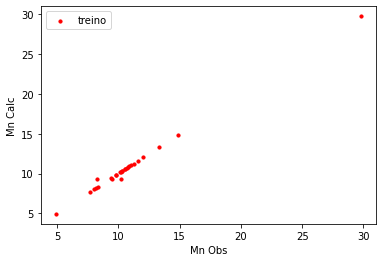

In [12]:
# expressa os dois dados em figura
fig = plt.figure()
ax1 = fig.add_subplot(111)
#ax1.scatter(y_obs_test,y_calc_test, s=10, c='b', marker="s", label='teste')
ax1.scatter(y_obs_train,y_calc_train, s=10, c='r', marker="o", label='treino')
plt.legend(loc='upper left')
#plt.xlim([15,30])
#plt.ylim([15,30])
plt.ylabel('Mn Calc')
plt.xlabel('Mn Obs')
plt.show()

In [13]:
mse=mean_squared_error(y_obs_train,y_calc_train)
print("MSE treino=",mse)
R2=r2_score(y_obs_train,y_calc_train)
print("R^2 treino=",R2)

MSE treino= 0.07640921836205472
R^2 treino= 0.9955451161524363


In [14]:
def function(x):
  global model
  x=x.reshape((1, 4))
  df = pd.DataFrame(x)
  Y=model.predict(df)
  fun=Y*(-1)
  return fun

In [15]:
bounds = [(-1, 1),(-1, 1),(-1, 1),(-1, 1)]
bounds = [(-2, 2),(-2, 2),(-2, 2),(-2, 2)]
Condicoes = optimize.differential_evolution(function,bounds,
                                      init="latinhypercube", # obs: init="random"
                                      maxiter=100, popsize=50,recombination=0.5)
Condicoes=pd.DataFrame(Condicoes.x.reshape(1, 4))
print(Condicoes)

          0    1         2    3
0 -1.598283 -2.0 -0.273467  2.0


In [16]:
Condicoes = np.array(Condicoes)
X_otimo=scaler_X.inverse_transform(Condicoes)
X_otimo

array([[24.93124464,  1.11438192,  0.55022182,  0.19542472]])

In [17]:
Condicoes

array([[-1.59828286, -2.        , -0.27346694,  2.        ]])

In [18]:
yopt=model.predict(np.array(Condicoes))
y_max = scaler_Y.inverse_transform(yopt.reshape(-1,1))
y_max

array([[37.95530614]])